x |--> a*x^3 + b*x^2 + c*x + d
{d: 49.46853109925234, c: -0.02742810366645668, b: -0.003444056228566775, a: 1.175213765043847e-05}
x |--> (1.175213765043847e-05)*x^3 - 0.003444056228566775*x^2 - 0.02742810366645668*x + 49.46853109925234


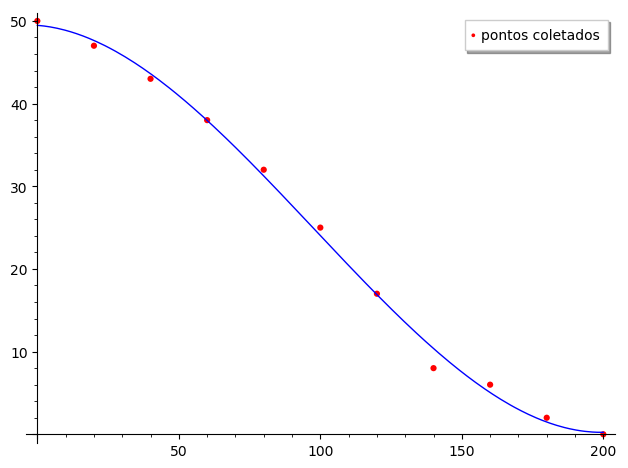

In [20]:
dados = [(0, 50),
 (20, 47),
 (40, 43),
 (60, 38),
 (80, 32),
 (100, 25),
 (120, 17),
 (140, 8),
 (160, 6),
 (180, 2),
 (200, 0)]
a,b,c,d = var('a', 'b', 'c','d')
modelo(x) = a*x^3+b*x^2+c*x+d
print modelo

e = find_fit(dados, modelo, solution_dict=True)
print e

modelo2 = modelo.subs(e)
print modelo2

point(dados,color = "red",size=20,legend_label="pontos coletados") + plot(modelo2,(x,0,200))


x |--> (3.525641295131541e-05)*x^2 - 0.00688811245713355*x - 0.02742810366645668


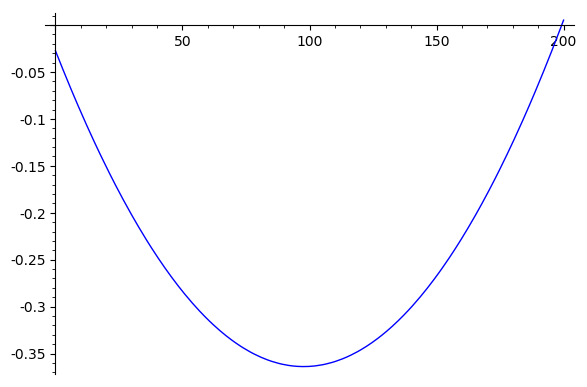

In [26]:
g(x) = diff(modelo2) #Ableitung 
print(g)
plot(g,(x,0,200)) 

In [27]:
qe = (g <= -1/3)
s1 = solve(qe,x) 
print s1 #Wertebereich 

[[x >= -40/605082203*sqrt(198156203028168905) + 18148000/185779, x <= 40/605082203*sqrt(198156203028168905) + 18148000/185779]]


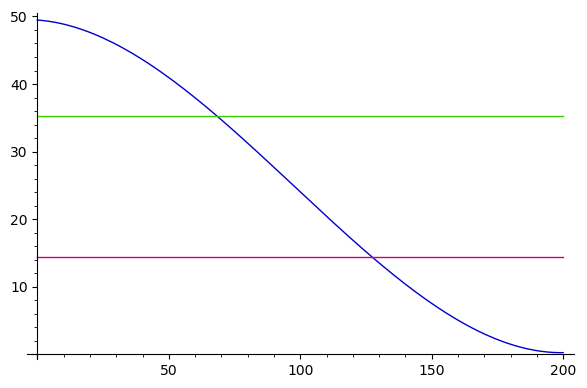

In [28]:
w1 = -40/605082203*sqrt(198156203028168905) + 18148000/185779 #Wertobergrenze 
w2 = 40/605082203*sqrt(198156203028168905) + 18148000/185779 #Wertuntergrenze 
t(x) = modelo2(w1)
z(x) = modelo2(w2)
plot([modelo2,t,z],0,200) 

In [30]:
stairHeigth = (t(0) - z(0)).n(digits=4) 
print stairHeigth 
countStairs = stairHeigth/0.2
print countStairs.n(digits=3) 

20.82
104.


In [33]:
i(x) = sqrt(1+(g(x))^2)
Length1 = (i.integral(x,0,w1)).n(digits=100)
print Length1
Length2 = i.integral(x,w2,200).n(digits=100)
print Length2 
Length = Length1 + Length2 
print Length 

69.9717912367
74.6003673552
144.572158592


In [35]:
area = (Length1+Length2)*1.2
print area
areaCosts = area*20
print areaCosts #Asphaltierungskosten 

173.486590310237
3469.73180620473


In [36]:
stairSurface = (w2-w1).n(digits=4) #Stufenlänge 
stairArea = (stairHeigth + stairSurface)*1.2 #Stufenlänge*Hügelbreite 
stairCosts = stairArea*30
print stairCosts 

2868.


In [37]:
totalCosts = stairCosts + areaCosts
print totalCosts

6338.
